In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
def FlujoMagnetico (t):
    r=0.125
    B0=0.05
    f=7
    Vang=3.5
    return np.pi*(r**2)*B0*np.cos(Vang*t)*np.cos(2*np.pi*f*t)

def Derivada (f,t,h=1e-6):
    return (f(t+h)-f(t-h))/(2*h)

def CorrienteInducida (t):
    R=1750
    return (-1/R)*Derivada(FlujoMagnetico,t)

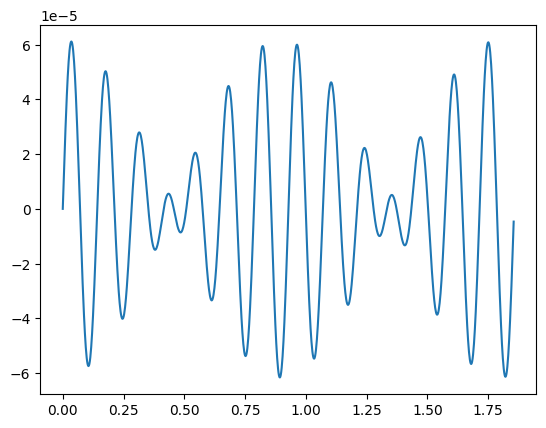

In [129]:
t=np.linspace(0,1.855,1000)
Y=CorrienteInducida(t)

plt.plot(t,Y)

In [130]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    
def GetRoots(n,f,df,x,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in x:
        if len(Roots)<n:
            root = GetNewton(f,df,i)

            if  type(root)!=bool:
                croot = np.round( root, tolerancia )
            
                if croot not in Roots and croot >=0:
                    Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [131]:
raices=GetRoots(4,CorrienteInducida,Derivada,t)
GetRoots(4,CorrienteInducida,Derivada,t)

array([0.        , 0.07096974, 0.14187736, 0.35208826])

Las tres primeros instantes de tiempo en segundos en los que la corriente sobre el bucle es cero (sin incluir t=0) son:

In [132]:
for i in range(1,len(raices)):
    print(raices[i])

0.0709697356
0.1418773622
0.3520882568
